# Fairness
Calculate the fairness on the sensitive factors like race and Gender.

In [15]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate
from fairlearn.metrics import demographic_parity_difference

path = 'Salary_Data.csv'

df = pd.read_csv(path)
# Combining the education level Bachelor's degree and Bachelor's
df['Education Level'] = df['Education Level'].replace("Bachelor's Degree", "Bachelor's")
df['Education Level'] = df['Education Level'].replace("phD", "PhD")
df['Education Level'] = df['Education Level'].replace("Master's Degree", "Master's")

df['Education Level'].value_counts()
df.head()

ImportError: cannot import name 'mean_absolute_error' from 'fairlearn.metrics' (/Users/bastienjossen/anaconda3/envs/pytorch_mps/lib/python3.11/site-packages/fairlearn/metrics/__init__.py)

In [7]:
df['Education Level'].value_counts()

Education Level
Bachelor's     3023
Master's       1861
PhD            1369
High School     448
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64

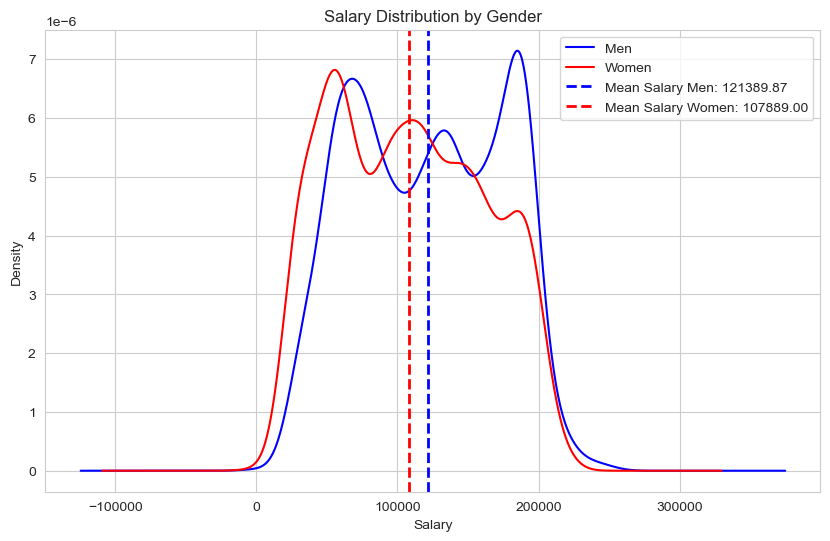

In [14]:
df = df[df['Gender'] != 'Other']
df['Gender'].value_counts()

# Separate the data by gender
salaries_men = df[df['Gender'] == 'Male']['Salary']
salaries_women = df[df['Gender'] == 'Female']['Salary']

# Calculate the mean salaries
mean_salary_men = salaries_men.mean()
mean_salary_women = salaries_women.mean()

# Create the plot
plt.figure(figsize=(10, 6))
salaries_men.plot(kind='density', label='Men', color='blue')
salaries_women.plot(kind='density', label='Women', color='red')

# Add vertical lines for the mean salaries
plt.axvline(mean_salary_men, color='blue', linestyle='dashed', linewidth=2, label=f'Mean Salary Men: {mean_salary_men:.2f}')
plt.axvline(mean_salary_women, color='red', linestyle='dashed', linewidth=2, label=f'Mean Salary Women: {mean_salary_women:.2f}')

plt.title('Salary Distribution by Gender')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.legend()
plt.show()